# <span style='color:blue'> Lending Club Case Study </span>
## Problem Statement
>The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import and Data read 

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px
loanC = pd.read_csv('/content/drive/Othercomputers/My Laptop/GDrive/MS/Project/lending_club_casestudy/loan.csv',low_memory=False)
#loanC= pd.read_csv("loan.csv",low_memory=False)

loanC.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [149]:
loanC.shape

(39717, 111)

# DataCleaning
### - Check whether the Member ID's are repeated
> - 3 Ways (Uncomment any)


In [150]:
#(~(loanC.member_id.value_counts()==1)).sum() ## If Sum is 0 then there are no repeated values of the member_id
#loanC.member_id.value_counts() ## Alternatively the count 39717 Matches tghe total range in info
loanC.member_id.duplicated().sum()## Alternatively Look for Member-ID Duplication

0

### - Drop the Columns/Rows which have all NA's
        - Many Columns Dropped(to 57)


In [151]:
LClb = loanC.dropna(axis=1,how='all')
LClb = LClb.dropna(axis=0,how='all')
LClb.shape

(39717, 57)

### - Check  All Columns not having NA


In [152]:
#LClb.loc[:,LClb.isna()]
LClb[~(LClb.isna().any(axis=1)==True)].shape

(14, 57)

### - Remove the Columns with only one Value (Which does not influence the results)
> . Use the lamda function for each column to find the size of value counts and check if there is only one value inthe value_counts

> Note : Columns with a one Valid value and NA is still treated as a single value columns

In [153]:
LClb = LClb.loc[:,list(map(lambda x : False if LClb[x].value_counts().size==1 else True , list(LClb)))] #remove single value columns
LClb.shape


(39717, 48)

### - Public recorded bankruptsies 
> . Replace NaN from this record to zero (Assume that those members are not bankrupt)
> . 




In [154]:
LClb.loc[(LClb.pub_rec_bankruptcies.isna()==True),"pub_rec_bankruptcies"] = 0
LClb.loc[(LClb.pub_rec_bankruptcies.isna()==True)]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [155]:
LClb["pub_rec_bankruptcies"].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [156]:
LClb.shape

(39717, 48)

### - Study of the Correlation between various columns to check whether any columns can be removed.
> . Replace NaN from this record to zero (Assume that those members are not bankrupt)
> . 


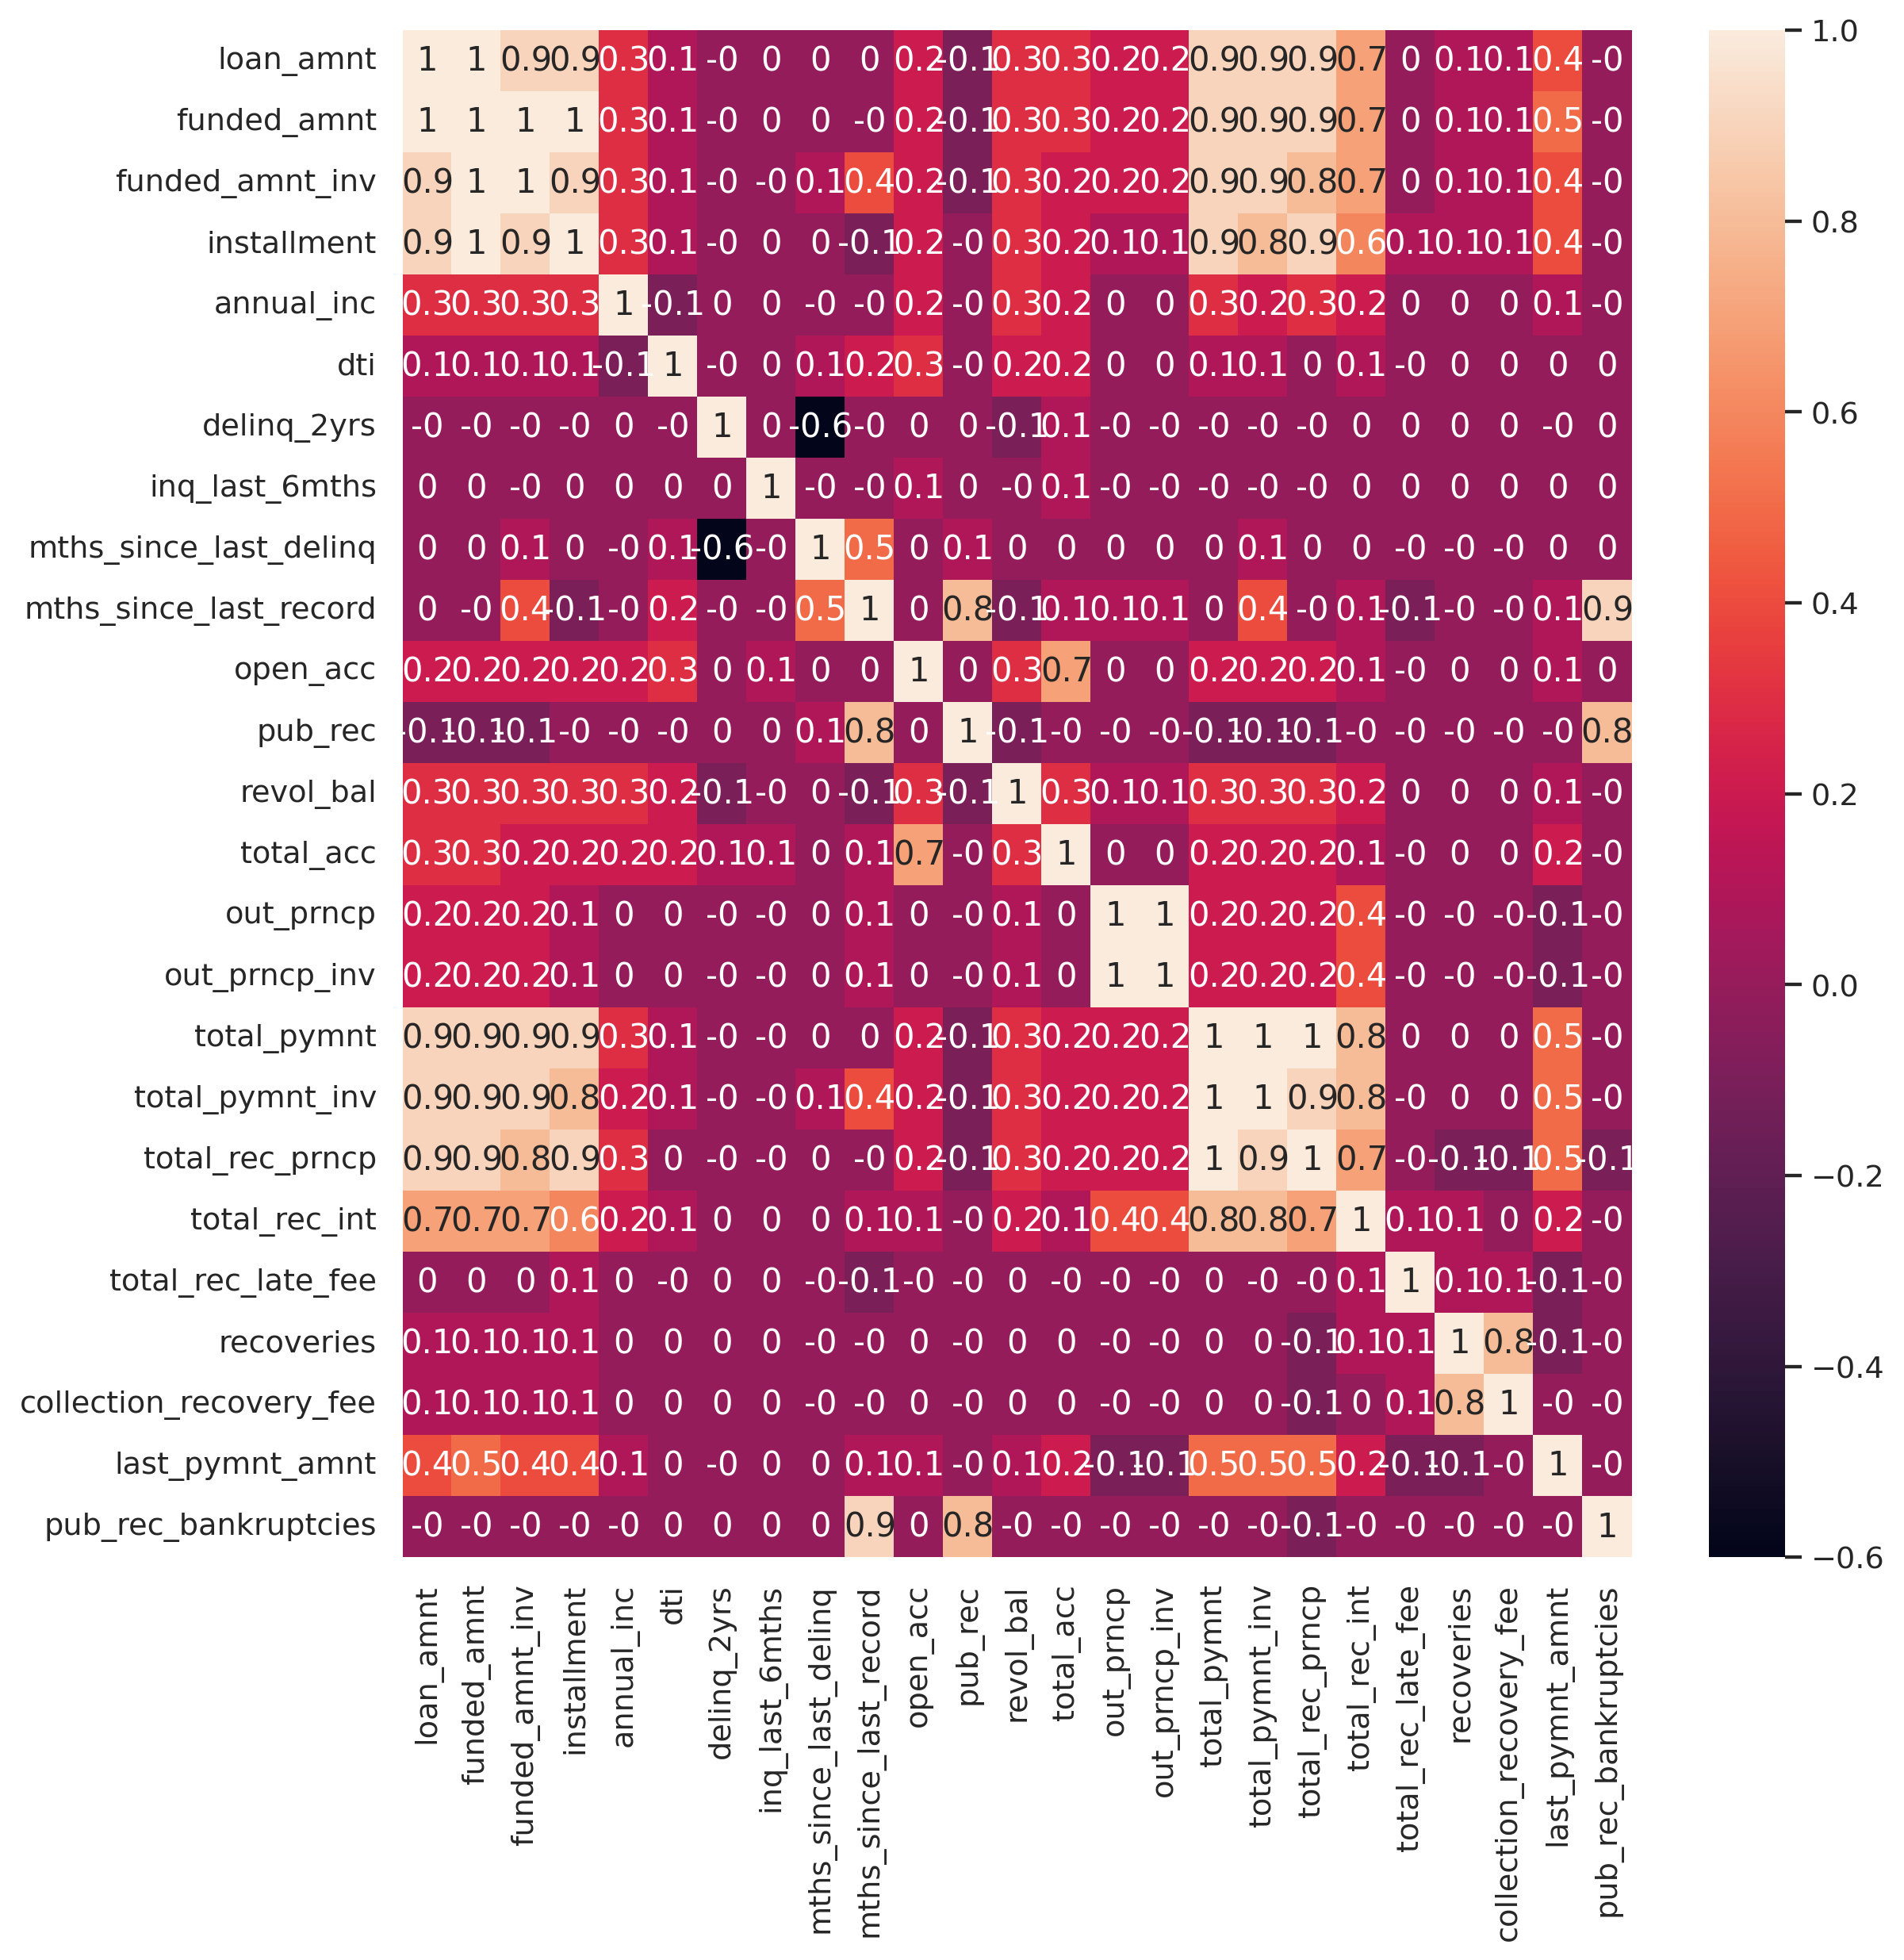

In [157]:
import plotly.express as px
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=250)
LClbCor = LClb.iloc[:,2:].corr().round(1)
sb.set(font_scale=1)
plt.xticks(rotation=0)
#LClbCor.style.background_gradient(cmap='PuBu')
sb.heatmap(LClb.iloc[:,2:].corr().round(1),annot=True)

### - Dropping Certain Colums which add least value in the Analysis

> - Unneccesary Columns 'desc','url'...etc
> - Drop Corrlelated Columns 

In [158]:
LClb.drop(columns = [ 'emp_title', 'url', 'desc', 'title'], inplace = True)


### - Clenup Employee Experience (Employment Length)

> - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years as specified in "RejectStats" of "DataDictionary.xlsx"

In [159]:
LClb.emp_length.astype('str').apply(lambda x: x[0:2] if (x[0:3] == '10+') else x).value_counts()#.apply(lambda x: 0 if (x[0] == '<') else x[0]).value_counts()
LClb.emp_length.astype('str').value_counts()
#else if (x[0:3] == '< 1 year ') 0 else x)
#runs.Runs = runs.Runs.apply(lambda x : x[:-2] if x[-1]=='*' else x)
LClb.emp_length = LClb.emp_length.astype('str').apply(lambda x: x[0:2] if (x[0:3] == '10+') else x).apply(lambda x: 0 if (x[0] == '<') else x).replace(regex = 'years',value = '').replace(regex = 'year',value = '').replace(to_replace='nan',value='0').astype("int32")
LClb.emp_length.value_counts()

10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [160]:
LClb.loc[5].value_counts().size


29

In [161]:
LClb.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,4.838835,6.896893e+04,13.315130,0.146512,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.042501
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,3.605528,6.379377e+04,6.678594,0.491812,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.202603
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [162]:
LClb.mths_since_last_delinq.describe()
LClb.verification_status.value_counts()
LClb.mths_since_last_record.describe()
LClb.loan_status.value_counts()
LClb.dti.describe()
LClb.pub_rec.value_counts()
LClb.purpose.value_counts()
LClb.delinq_2yrs.value_counts()  #The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
#A delinquency is a late payment.The consequences of a delinquency can be severe when it comes to your credit score.
LClb.mths_since_last_record.value_counts()

0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64

In [163]:
LClb.emp_length.isna().sum()
LClb.grade

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

7     2917
3     2886
4     2742
9     2704
8     2512
10    2136
6     2057
11    2011
5     1830
2     1810
12    1529
1     1508
16    1348
13    1236
14    1186
17    1173
0     1139
18     981
15     931
19     874
20     763
21     656
22     553
23     454
24     416
25     329
26     249
27     185
28     168
29     118
30     104
31      78
33      56
32      48
34      30
Name: sgradenum, dtype: int64

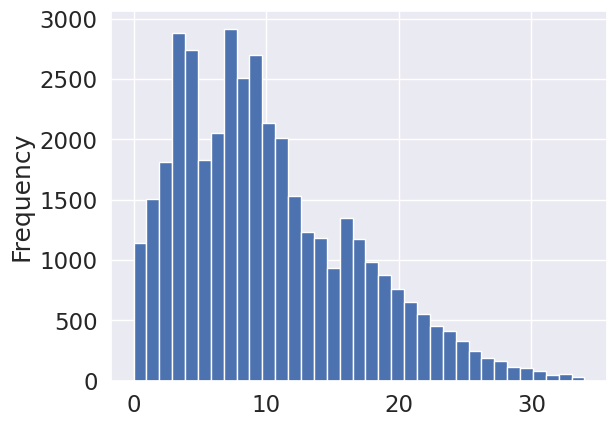

In [195]:
import numpy as np
LClb['sgradenum']=LClb['sub_grade'].replace(LClb.sub_grade.astype('str').sort_values().unique(),np.array(range(0,35)),inplace=False)

#LClb.loc[LClb.sgradenum > 22,'sgradenum']=LClb.sgradenum.median()
LClb.sgradenum.plot.hist(bins=35)
LClb.sgradenum.value_counts()

In [168]:
LClb.sub_grade.sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [100]:
np.array(range(0,35))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

# Exploratory Data Analysis


## Univariate and Segmented Univariate Analysis

### - Frequency Analysis of the loan Amount

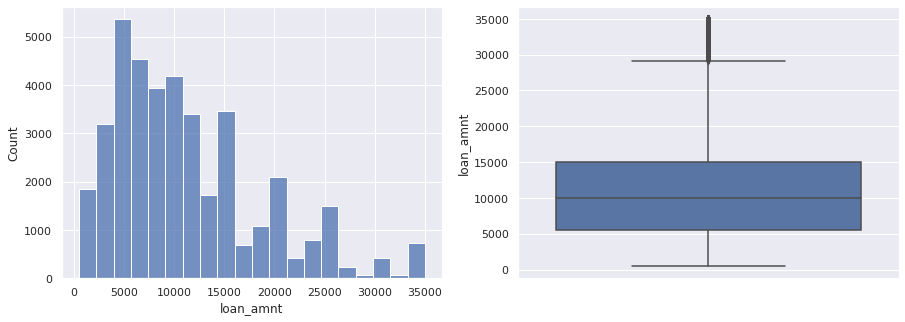

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sb.histplot(LClb.loan_amnt,ax=axes[0],bins=20)
sb.boxplot(ax=axes[1],x=None,y=LClb.loan_amnt)

### - Frequency Rank plot for Debt to Income Ratio


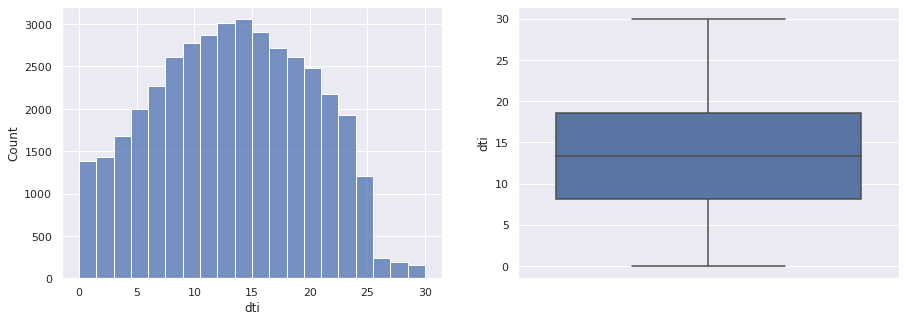

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sb.histplot(LClb.dti,ax=axes[0],bins=20)
sb.boxplot(ax=axes[1],x=None,y=LClb.dti)

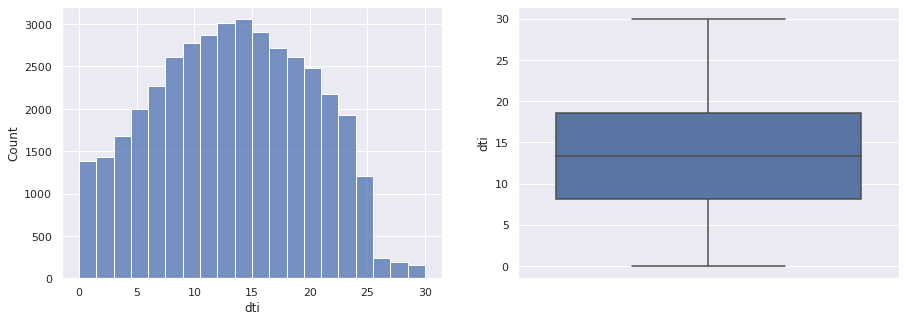

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sb.histplot(LClb.dti,ax=axes[0],bins=20)
sb.boxplot(ax=axes[1],x=None,y=LClb.dti)

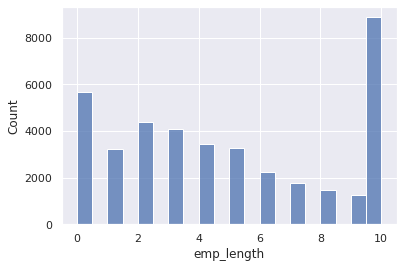

In [30]:
#fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sb.histplot(LClb.emp_length,bins=20)


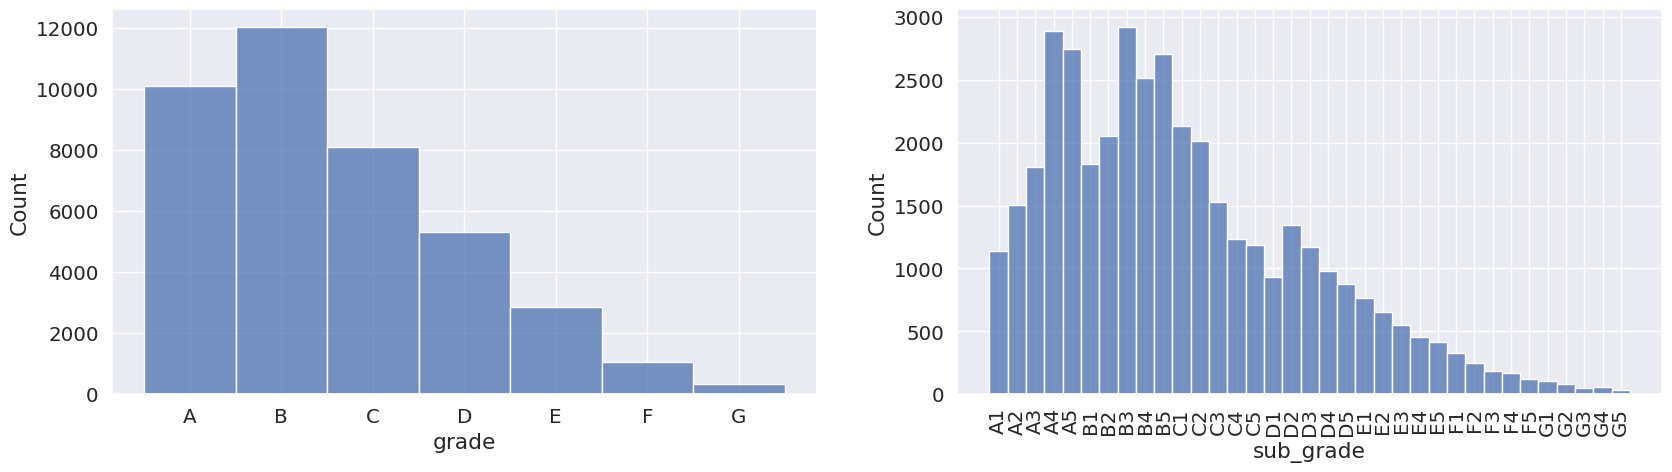

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
plt.xticks(rotation=90)
sb.histplot(LClb.grade.sort_values(),ax=axes[0],bins=10)
sb.histplot(LClb.sub_grade.sort_values(),ax=axes[1],bins=10)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


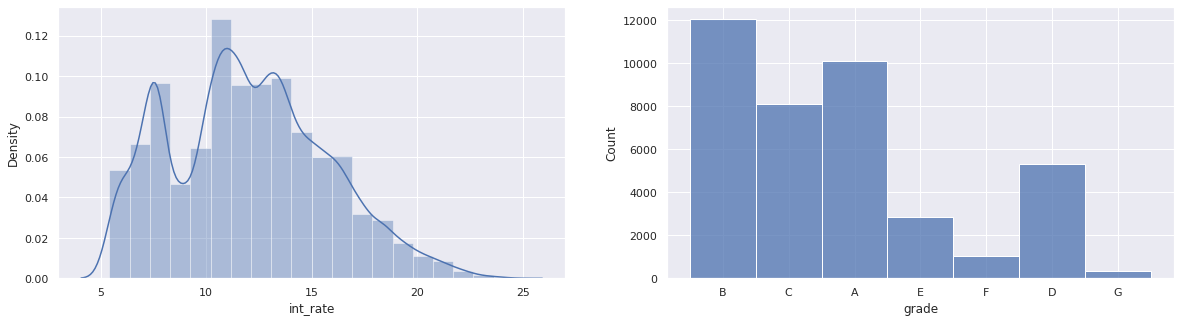

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sb.distplot(LClb.int_rate.apply(lambda x:  x[:-1]).astype("float32"),ax=axes[0],bins=20)
sb.histplot(LClb.grade,ax=axes[1],bins=20)


In [33]:
LClb.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [34]:
LClb[LClb.annual_inc>0.15e06].annual_inc.value_counts().sum()

1551

In [35]:
LClb.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [36]:
1551/39717

0.039051287861620966

In [37]:
df = sb.load_dataset('tips')  
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## BiVariate Analysis

In [38]:
LClb.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [39]:
LClb.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

### -Relationship between the Grade and the Loan Status
> - Find the relationship between two catorical variables Grade and loan status
> - Find the relationship between two catorical variables Sub-Grade and loan status
> - Find the Prabability of Default(Charged Off) for each Grades/Sub-Grades  

In [40]:
LC1b_GradevsLS = LClb.filter(items =["grade","loan_status"] )
TblGrdVersusLS = pd.crosstab(LC1b_GradevsLS.loan_status, LC1b_GradevsLS["grade"], margins=True,     values=LC1b_GradevsLS["loan_status"], aggfunc='count').round(2)
TblGrdVersusLS.loc["Prob_Def",:] = TblGrdVersusLS.loc["Charged Off",:]/TblGrdVersusLS.loc["All",:]
TblGrdVersusLS.head()

grade,A,B,C,D,E,F,G,All
loan_status,,,,,,,,
Charged Off,602.000000,1425.000000,1347.000000,1118.000000,715.000000,319.000000,101.00000,5627.000000
Current,40.000000,345.000000,264.000000,222.000000,179.000000,73.000000,17.00000,1140.000000
Fully Paid,9443.000000,10250.000000,6487.000000,3967.000000,1948.000000,657.000000,198.00000,32950.000000
All,10085.000000,12020.000000,8098.000000,5307.000000,2842.000000,1049.000000,316.00000,39717.000000
Prob_Def,0.059693,0.118552,0.166337,0.210665,0.251583,0.304099,0.31962,0.141677


<function matplotlib.pyplot.show(*args, **kw)>

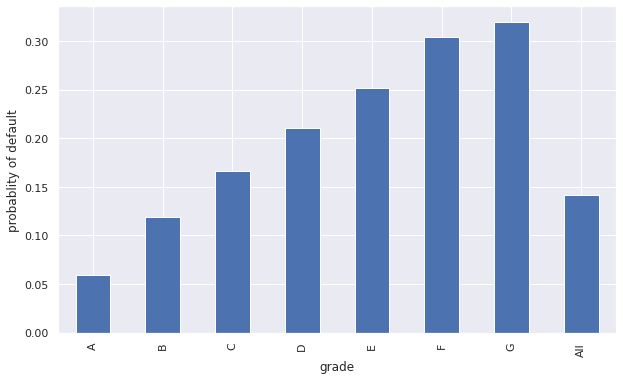

In [41]:
TblGrdVersusLS.iloc[4,:].plot.bar(figsize=[10,6])
plt.ylabel("probablity of default")
plt.show

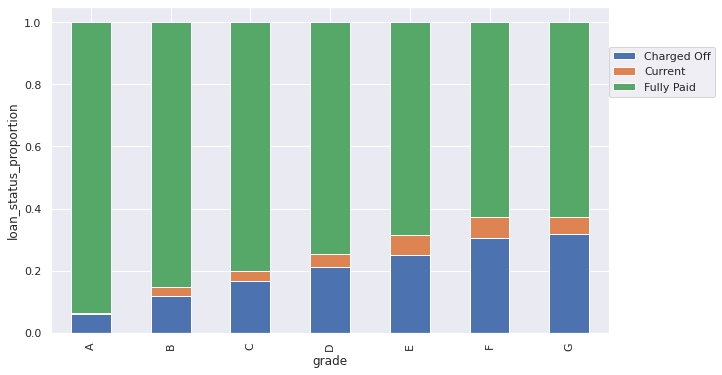

In [42]:
#TblGrdVersusLS.loc["Prob_Def",:].plot(kind="bar", stacked="True", figsize=[10,6])
#}plt.show()
TblGrdVersusLS_perc = TblGrdVersusLS.transpose().iloc[:-1,:-2].apply(lambda x: x/x.sum(), axis=1)
TblGrdVersusLS_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.ylabel("loan_status_proportion")
plt.legend(bbox_to_anchor=(1.2, 0.8),loc='right')
plt.show()

In [43]:
LC1b_SGradevsLS = LClb.filter(items =["sub_grade","loan_status"] )
TblSGrdVersusLS = pd.crosstab(LC1b_SGradevsLS.loan_status, LC1b_SGradevsLS["sub_grade"], margins=True,     values=LC1b_SGradevsLS["loan_status"], aggfunc='count').round(2)
TblSGrdVersusLS.head()

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F2,F3,F4,F5,G1,G2,G3,G4,G5,All
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,30.0,74.0,103.0,178.0,217.0,171.0,228.0,341.0,329.0,356.0,...,70.0,51.0,53.0,54.0,31.0,28.0,19.0,13.0,10.0,5627
Current,NaN,NaN,NaN,13.0,27.0,33.0,56.0,92.0,75.0,89.0,...,16.0,11.0,17.0,5.0,10.0,1.0,3.0,2.0,1.0,1140
Fully Paid,1109.0,1434.0,1707.0,2695.0,2498.0,1626.0,1773.0,2484.0,2108.0,2259.0,...,163.0,123.0,98.0,59.0,63.0,49.0,26.0,41.0,19.0,32950
All,1139.0,1508.0,1810.0,2886.0,2742.0,1830.0,2057.0,2917.0,2512.0,2704.0,...,249.0,185.0,168.0,118.0,104.0,78.0,48.0,56.0,30.0,39717


In [44]:

LC1b_SGradevsLS = LClb.filter(items =["sub_grade","grade","loan_status"] )
#TblSGrdVersusLS = pd.pivot_table(data=LC1b_SGradevsLS, values="loan_status", columns="sub_grade", aggfunc='count')
TblSGrdVersusLS.loc["Prob_Def",:] = TblSGrdVersusLS.loc["Charged Off",:]/TblSGrdVersusLS.loc["All",:]
TblSGrdVersusLS.head()


sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F2,F3,F4,F5,G1,G2,G3,G4,G5,All
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,30.000000,74.000000,103.000000,178.000000,217.000000,171.000000,228.000000,341.000000,329.000000,356.000000,...,70.000000,51.000000,53.000000,54.000000,31.000000,28.000000,19.000000,13.000000,10.000000,5627.000000
Current,NaN,NaN,NaN,13.000000,27.000000,33.000000,56.000000,92.000000,75.000000,89.000000,...,16.000000,11.000000,17.000000,5.000000,10.000000,1.000000,3.000000,2.000000,1.000000,1140.000000
Fully Paid,1109.000000,1434.000000,1707.000000,2695.000000,2498.000000,1626.000000,1773.000000,2484.000000,2108.000000,2259.000000,...,163.000000,123.000000,98.000000,59.000000,63.000000,49.000000,26.000000,41.000000,19.000000,32950.000000
All,1139.000000,1508.000000,1810.000000,2886.000000,2742.000000,1830.000000,2057.000000,2917.000000,2512.000000,2704.000000,...,249.000000,185.000000,168.000000,118.000000,104.000000,78.000000,48.000000,56.000000,30.000000,39717.000000
Prob_Def,0.026339,0.049072,0.056906,0.061677,0.079139,0.093443,0.110841,0.116901,0.130971,0.131657,...,0.281124,0.275676,0.315476,0.457627,0.298077,0.358974,0.395833,0.232143,0.333333,0.141677


<function matplotlib.pyplot.show(*args, **kw)>

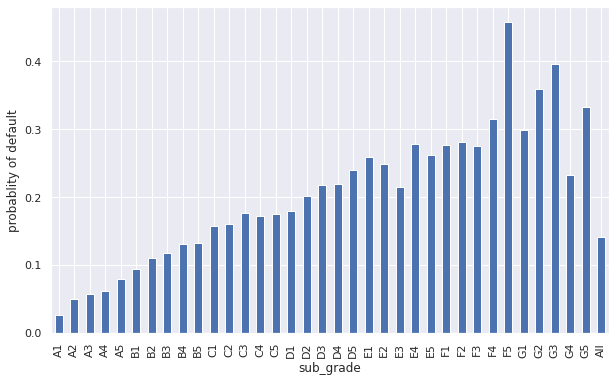

In [45]:
#plt.scatter(TblSGrdVersusLS.sub_grade.unique, TblSGrdVersusLS.loc["Prob_Def",:])
TblSGrdVersusLS.iloc[4,:].plot.bar(figsize=[10,6])
plt.ylabel("probablity of default")

plt.show

> Subgradewise Probability of Default

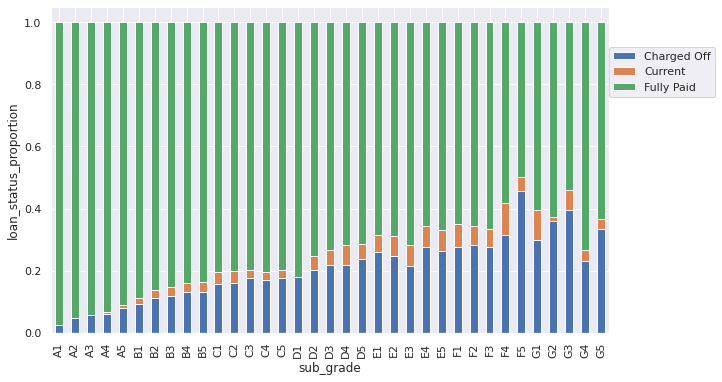

In [46]:
#blSGrdVersusLS.transpose().plot(kind="bar", stacked="True", figsize=[10,6])
TblSGrdVersusLS_perc = TblSGrdVersusLS.transpose().iloc[:-1,:-2].apply(lambda x: x/x.sum(), axis=1)
TblSGrdVersusLS_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.ylabel("loan_status_proportion")
plt.legend(bbox_to_anchor=(1.2, 0.8),loc='right')
plt.show()


### - Is there any Relationship between purpose of loan versus the loan defaults
> - Find the relationship between two catorical variables Grade and loan status
> - Find the relationship between two catorical variables Sub-Grade and loan status
> - Find the Prabability of Default(Charged Off) For each Grades/Sub-Grades

In [47]:
LClb.purpose.value_counts(normalize=True)*100


debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [48]:
TblPurVersusLS = pd.crosstab(LClb.loan_status, LClb["purpose"], margins=True,     values=LClb["loan_status"], aggfunc='count').round(2)
TblPurVersusLS.loc["Prob_Def",:] = TblPurVersusLS.loc["Charged Off",:]/TblPurVersusLS.loc["All",:]
TblPurVersusLS.head()


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,All
loan_status,,,,,,,,,,,,,,,
Charged Off,160.000000,542.000000,2767.000000,56.000000,347.000000,59.000000,222.000000,106.000000,92.000000,633.000000,19.000000,475.000000,53.000000,96.000000,5627.000000
Current,50.000000,103.000000,586.000000,NaN,101.000000,14.000000,37.000000,12.000000,7.000000,128.000000,1.000000,74.000000,6.000000,21.000000,1140.000000
Fully Paid,1339.000000,4485.000000,15288.000000,269.000000,2528.000000,308.000000,1928.000000,575.000000,484.000000,3232.000000,83.000000,1279.000000,322.000000,830.000000,32950.000000
All,1549.000000,5130.000000,18641.000000,325.000000,2976.000000,381.000000,2187.000000,693.000000,583.000000,3993.000000,103.000000,1828.000000,381.000000,947.000000,39717.000000
Prob_Def,0.103292,0.105653,0.148436,0.172308,0.116599,0.154856,0.101509,0.152958,0.157804,0.158527,0.184466,0.259847,0.139108,0.101373,0.141677


Text(0.5, 0, 'probablity of default')

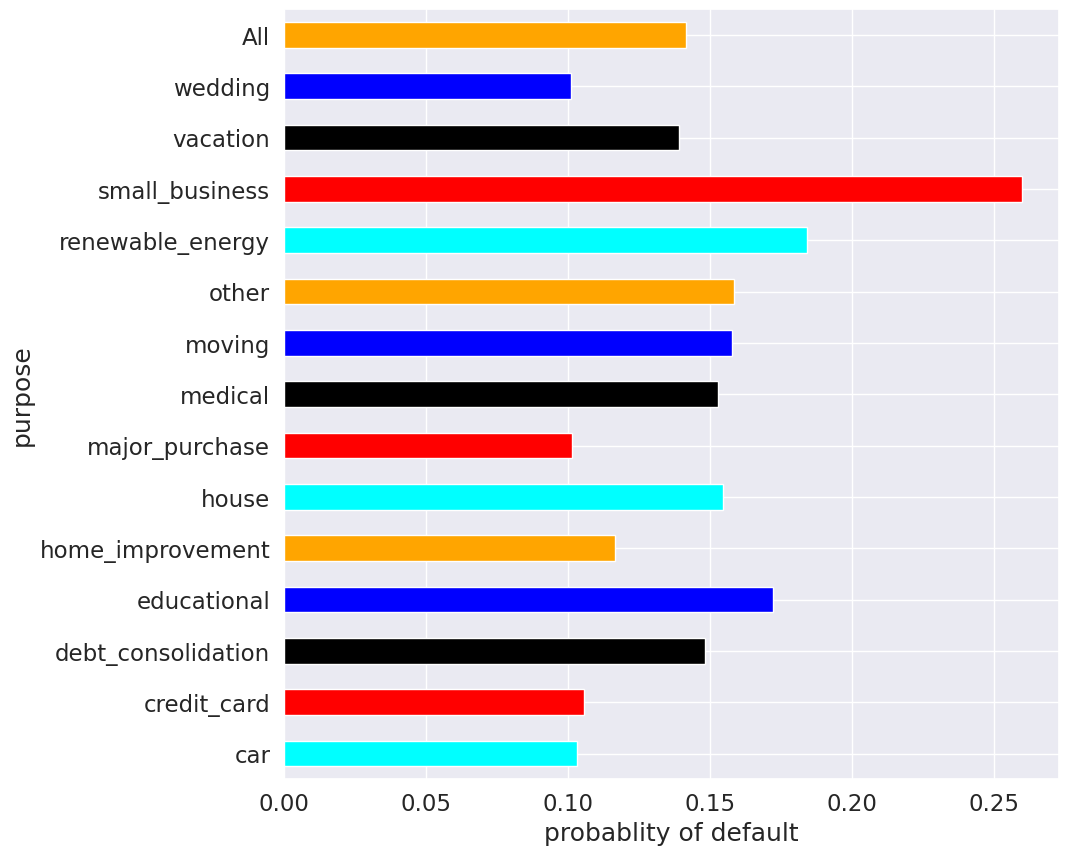

In [63]:
c = ['cyan', 'red', 'black', 'blue', 'orange']
TblPurVersusLS.iloc[4,:].plot.barh(figsize=[10,10],color=c)
plt.show
plt.xlabel("probablity of default")
#sb.barplot(x=TblPurVersusLS.iloc[4],y=TblPurVersusLS.iloc[4,:])

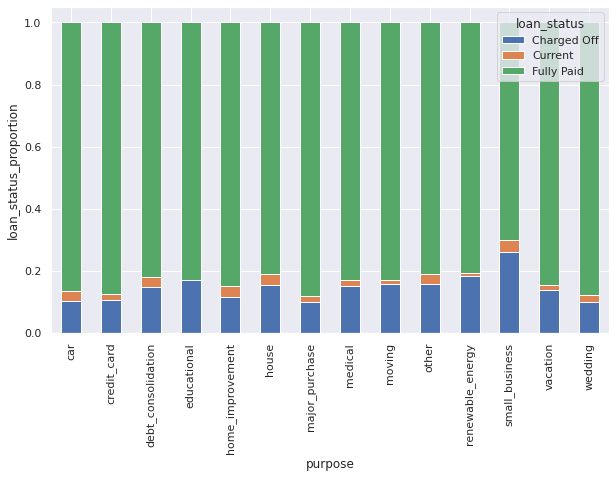

In [50]:
TblPurVersusLS_perc = TblPurVersusLS.transpose().iloc[:-1,:-2].apply(lambda x: x/x.sum(), axis=1)
TblPurVersusLS_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.ylabel("loan_status_proportion")
plt.show()

### - Is there any Relationship between purpose of loan versus the mean interest rates
> - Find the relationship between two catorical variables Grade and loan status
> - Find the relationship between two catorical variables Sub-Grade and loan status
> - Find the Prabability of Default(Charged Off) For each Grades/Sub-Grades

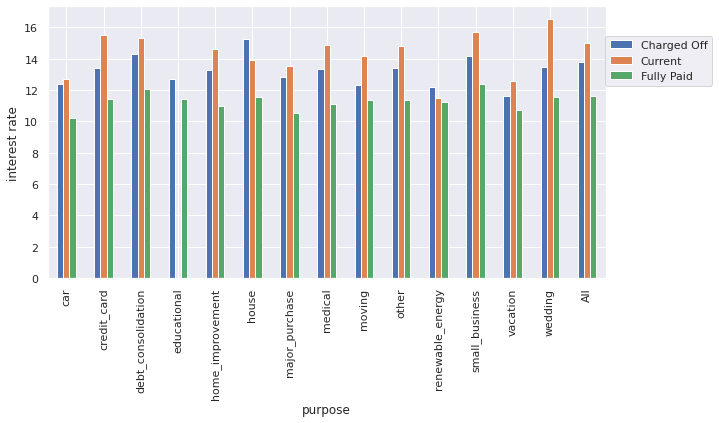

In [51]:
LClb.int_rate.apply(lambda x:  x[:-1]).astype('float')
TblPurIntrate = pd.crosstab(LClb.int_rate.apply(lambda x:  x[:-1]).astype('float'), LClb["purpose"], margins=True,     values=LClb.int_rate.apply(lambda x:  x[:-1]).astype('float'), aggfunc='mean').round(2)
#TblPurIntrate.loc["Prob_Def",:] = TblPurVersusLS.loc["Charged Off",:]/TblSGrdVersusLS.loc["All",:]
#TblPurIntrate.head()
TblPurIntrate = pd.crosstab(LClb.loan_status, LClb["purpose"], margins=True,     values=LClb.int_rate.apply(lambda x:  x[:-1]).astype('float'), aggfunc='mean').round(2)
TblPurIntrate.iloc[:-1,:].transpose().plot.bar(figsize=[10,5])
plt.ylabel("interest rate")
plt.legend(bbox_to_anchor=(1.2, 0.8),loc='right')

### - Spread of  Annual Income among various Loan_Status Categories (Seen across "Purpose" category)
> - Find the relationship between two Numerical variable Annual income with catorical Loan Status and Purpose


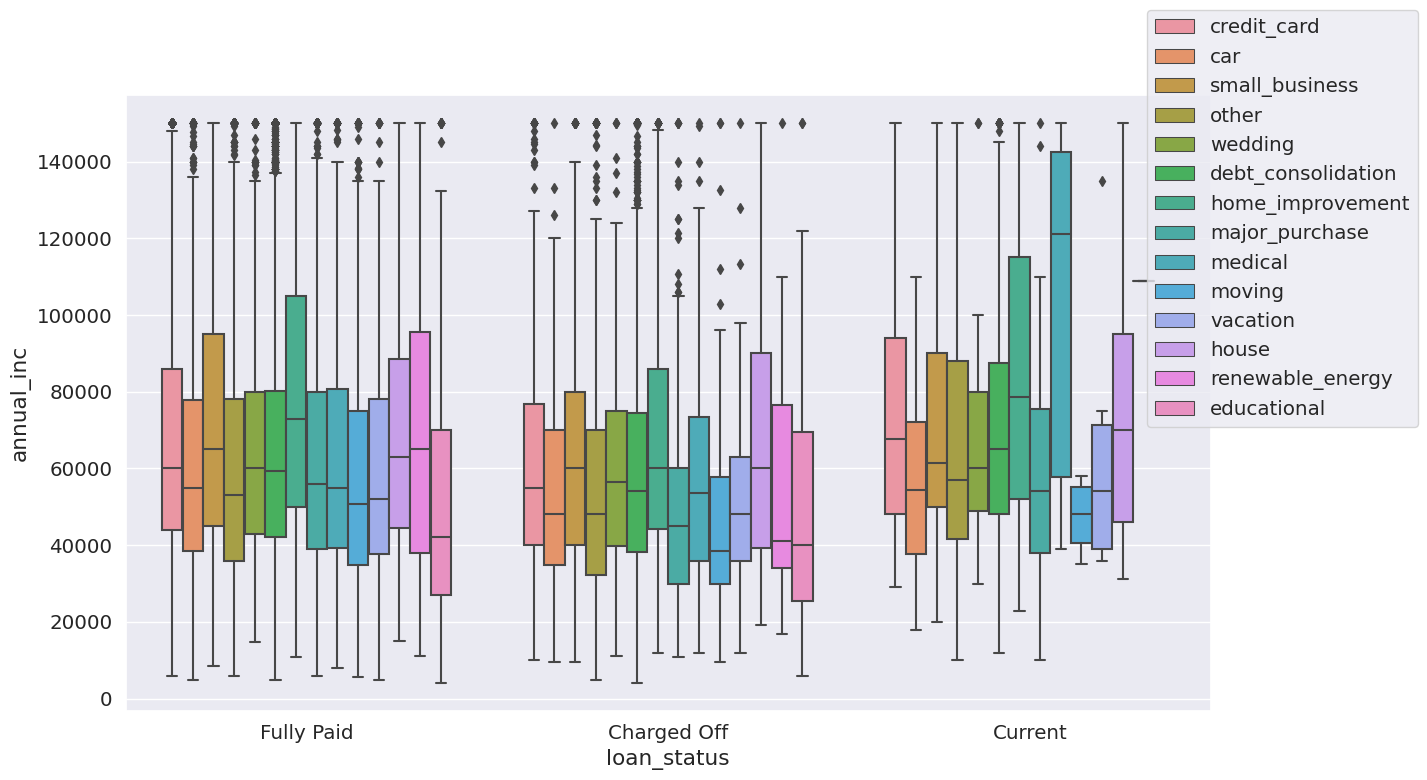

In [75]:

## Data Cleaning for Annual_inc
LClb_mod = LClb;
LClb_mod[LClb_mod.annual_inc>0.15e06].annual_inc.value_counts().sum()
LClb_mod.loc[LClb_mod.annual_inc>0.15e06,"annual_inc"] = 0.15e06
#
sb.set(font_scale=1.3)
plt.figure(figsize =(14, 8))
sb.boxplot(x='loan_status', y='annual_inc', data=LClb_mod,hue='purpose')
plt.show
plt.legend(bbox_to_anchor=(1.2, 0.8),loc='right')
#plt.title('Graph')
   

<function matplotlib.pyplot.show(*args, **kw)>

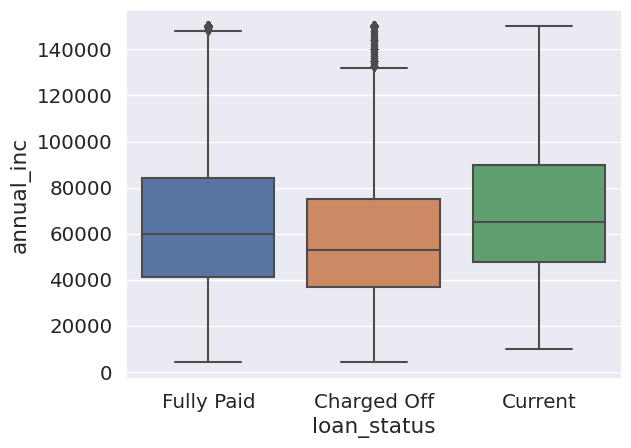

In [67]:
sb.boxplot(x='loan_status', y='annual_inc', data=LClb_mod)
plt.show


### - Is there any Relationship between Employment Length versus the Default


In [72]:
#LC1b_ELvsLS = LClb.filter(items =["emp_length","loan_status"] )
Tbl_ELvsLS = pd.crosstab(LClb.loan_status, LClb["emp_length"], margins=True,     values=LClb["loan_status"], aggfunc='count').round(2)
Tbl_ELvsLS.loc["Prob_Def",:] = Tbl_ELvsLS.loc["Charged Off",:]/Tbl_ELvsLS.loc["All",:]
Tbl_ELvsLS = Tbl_ELvsLS.fillna(0)
Tbl_ELvsLS.head()

emp_length,0,1,2,3,4,5,6,7,8,9,10,All
loan_status,,,,,,,,,,,,
Charged Off,867.000000,456.000000,567.000000,555.000000,462.000000,458.000000,307.00000,263.000000,203.000000,158.000000,1331.000000,5627.000000
Current,117.000000,71.000000,97.000000,83.000000,94.000000,88.000000,61.00000,62.000000,44.000000,32.000000,391.000000,1140.000000
Fully Paid,4674.000000,2713.000000,3724.000000,3457.000000,2880.000000,2736.000000,1861.00000,1448.000000,1232.000000,1068.000000,7157.000000,32950.000000
All,5658.000000,3240.000000,4388.000000,4095.000000,3436.000000,3282.000000,2229.00000,1773.000000,1479.000000,1258.000000,8879.000000,39717.000000
Prob_Def,0.153234,0.140741,0.129216,0.135531,0.134459,0.139549,0.13773,0.148336,0.137255,0.125596,0.149904,0.141677


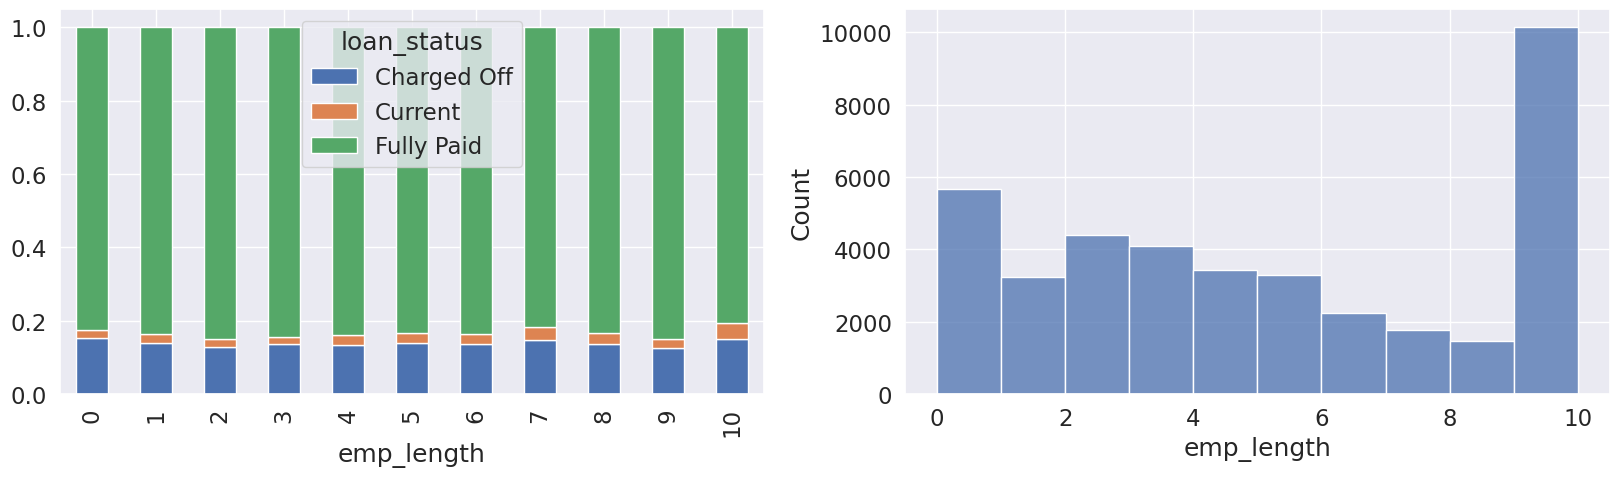

In [73]:
sb.set(font_scale=1.5)
Tbl_ELvsLS_perc = Tbl_ELvsLS.transpose().iloc[:-1,:-2].apply(lambda x: x/x.sum(), axis=1)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
Tbl_ELvsLS_perc.plot(kind="bar", stacked="True",ax=axes[0])
sb.histplot(LClb.emp_length,bins=10,ax=axes[1])
plt.show()

### - Is there any Relationship between Deliquency versus the Default


In [56]:
Tbl_DelvsLS = pd.crosstab(LClb.loan_status, LClb["delinq_2yrs"], margins=True,     values=LClb["loan_status"], aggfunc='count').round(2)
Tbl_DelvsLS.loc["Prob_Def",:] = Tbl_DelvsLS.loc["Charged Off",:]/Tbl_DelvsLS.loc["All",:]
Tbl_DelvsLS = Tbl_DelvsLS.fillna(0)
Tbl_DelvsLS.head()

delinq_2yrs,0,1,2,3,4,5,6,7,8,9,11,All
loan_status,,,,,,,,,,,,
Charged Off,4936.000000,507.000000,130.000000,35.000000,13.000000,3.000000,1.0,1.00,1.0,0.0,0.0,5627.000000
Current,1019.000000,96.000000,14.000000,8.000000,2.000000,1.000000,0.0,0.00,0.0,0.0,0.0,1140.000000
Fully Paid,29450.000000,2700.000000,543.000000,177.000000,47.000000,18.000000,9.0,3.00,1.0,1.0,1.0,32950.000000
All,35405.000000,3303.000000,687.000000,220.000000,62.000000,22.000000,10.0,4.00,2.0,1.0,1.0,39717.000000
Prob_Def,0.139415,0.153497,0.189229,0.159091,0.209677,0.136364,0.1,0.25,0.5,0.0,0.0,0.141677


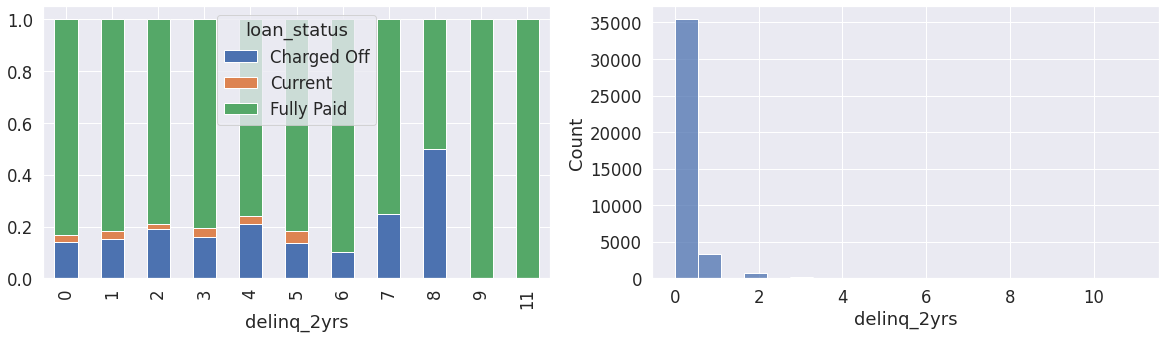

In [57]:
sb.set(font_scale=1.5)
Tbl_DelvsLS_perc = Tbl_DelvsLS.transpose().iloc[:-1,:-2].apply(lambda x: x/x.sum(), axis=1)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
Tbl_DelvsLS_perc.plot(ax=axes[0],kind="bar", stacked="True")

sb.histplot(LClb.delinq_2yrs,ax=axes[1],bins=20)
plt.show()

### - Influence of Home ownership status with the loan status

In [58]:
Tbl_HOVsLS= pd.crosstab(LClb.loan_status, LClb["home_ownership"], margins=True,     values=LClb["loan_status"], aggfunc='count').round(2)
Tbl_HOVsLS.loc["Prob_Def",:] = Tbl_HOVsLS.loc["Charged Off",:]/Tbl_HOVsLS.loc["All",:]
Tbl_HOVsLS.head()
Tbl_HOVsLS = Tbl_HOVsLS.fillna(0)
Tbl_HOVsLS

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
loan_status,,,,,,
Charged Off,2327.000000,0.0,18.000000,443.000000,2839.00000,5627.000000
Current,638.000000,0.0,0.000000,83.000000,419.00000,1140.000000
Fully Paid,14694.000000,3.0,80.000000,2532.000000,15641.00000,32950.000000
All,17659.000000,3.0,98.000000,3058.000000,18899.00000,39717.000000
Prob_Def,0.131774,0.0,0.183673,0.144866,0.15022,0.141677


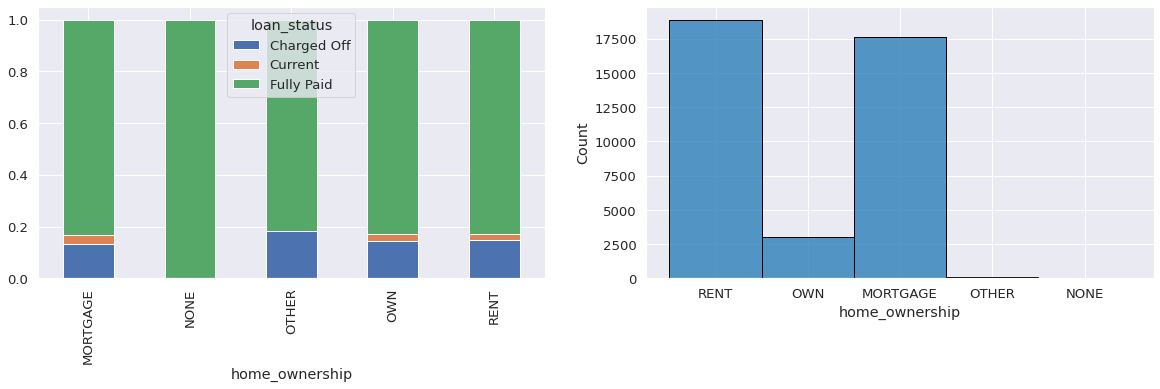

In [59]:
sb.set(font_scale=1.2)
Tbl_HOVsLS_perc = Tbl_HOVsLS.transpose().iloc[:-1,:-2].apply(lambda x: x/x.sum(), axis=1)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
Tbl_HOVsLS_perc.plot(ax=axes[0],kind="bar", stacked="True")
sb.reset_defaults()

sb.histplot(LClb.home_ownership,ax=axes[1],bins=20)
plt.show()

# RISK ASSESSMENT

### FICO Score 

![image.png](attachment:image.png)

https://www.myfico.com/credit-education/whats-in-your-credit-score

![image.png](attachment:image.png)


https://www.forbes.com/advisor/credit-score/what-is-vantagescore/
> https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03

In [60]:
#LClb[].loan_status.value_counts(normalize=True)


### -Correlation of All Numeric Variables with the Loan_Default 


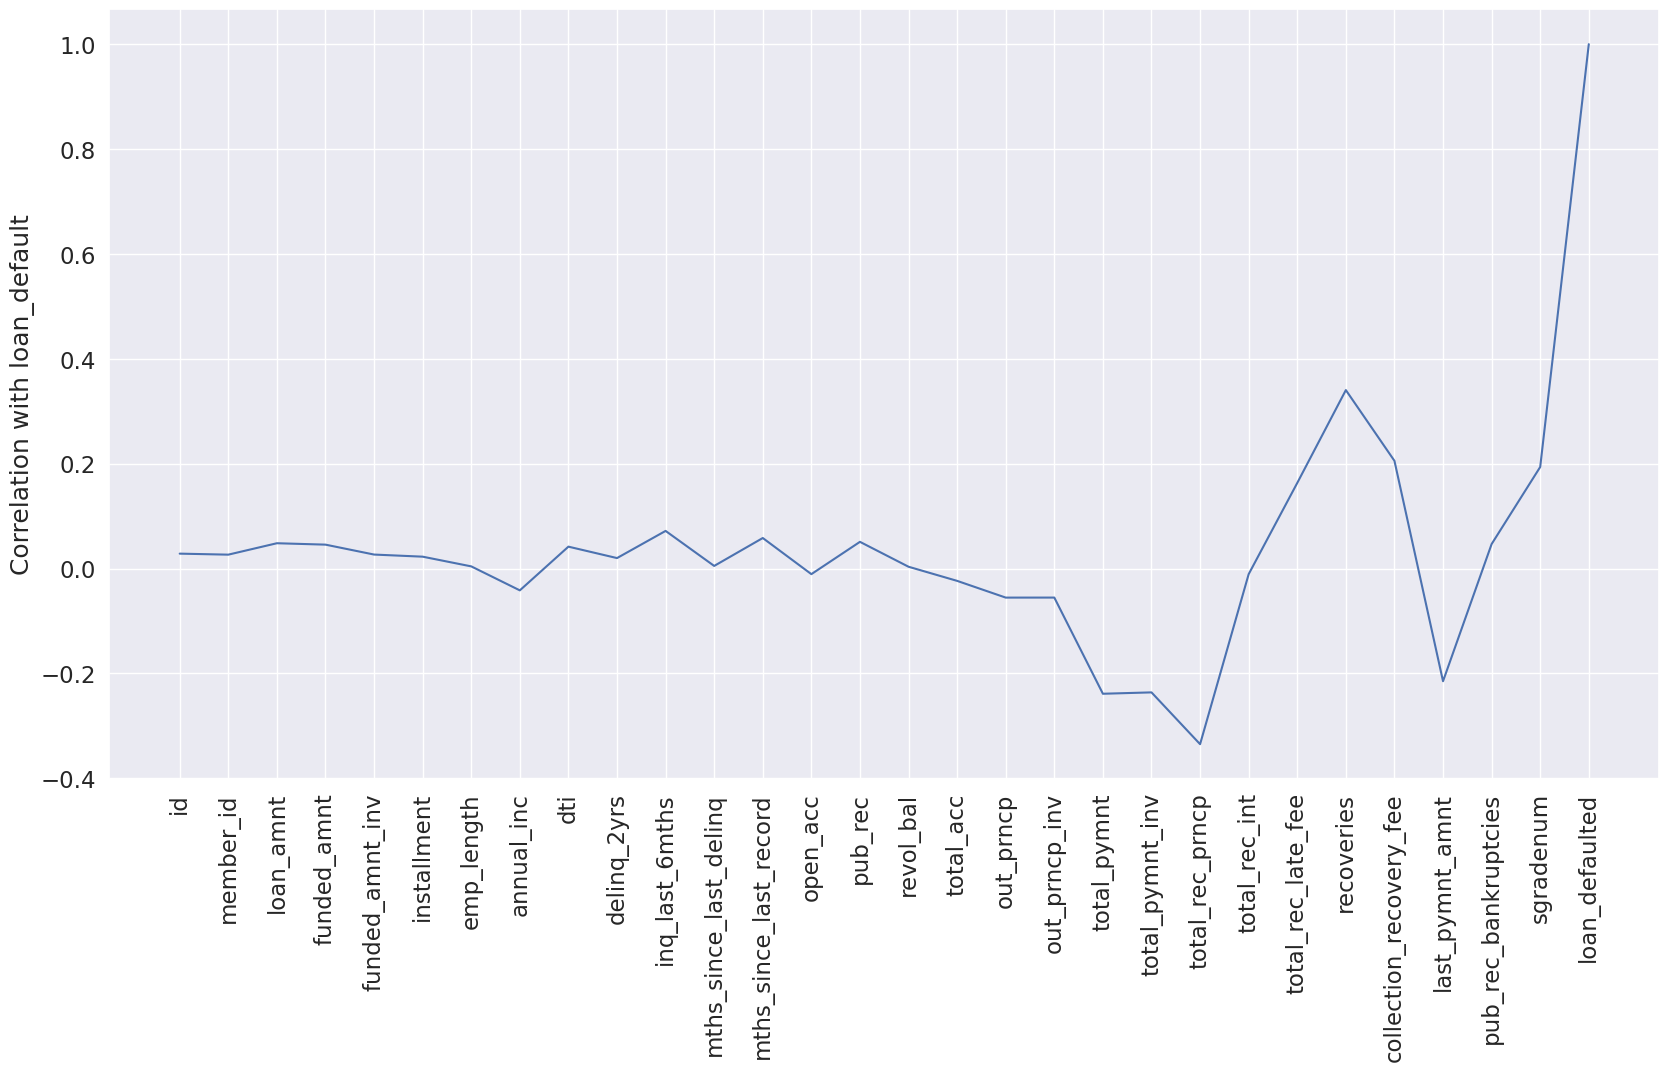

In [202]:
from pandas.core.indexes.interval import annotations
import plotly.express as px
#fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
#fig.show()
LClb["loan_defaulted"] =  LClb.loan_status.apply(lambda x: 1 if (x=="Charged Off") else 0 )
LoanDfltCorr = LClb.corrwith(LClb.loan_defaulted)
sb.set(font_scale=1.5)
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)

plt.ylabel("Correlation with loan_default")
sb.lineplot(data=LoanDfltCorr)
plt.show

fig = px.scatter(data_frame=LoanDfltCorr)
fig.show()

In [62]:
sb.reset_defaults

<function seaborn.rcmod.reset_defaults()>